<h1>Ejemplo ML con varios algoritmos</h1>

El presente notebook muestra un ejemplo de resolución de un mismo problema con varios algoritmos de machine learning. Con él se pretende ilustrar un poco la diferencia entre algoritmo y framework ML. El problema escogido es el problema de clasificación de dígitos MNIST, que es una especie de "Hello world" dentro del mundo del machine learning. Los algoritmos y frameworks utilizados serán:

<table style='{align:left;}'>
<tr><th>Algoritmo</th><th>Framework</th></tr>
<tr><td>Random Forests</td><td>Scikit-Learn</td></tr>
<tr><td>Convolutional Neural Network</td><td>Keras sobre Tensorflow</td></tr>
</table>

En primer lugar, vamos a importar una serie de paquetes comunes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importamos el dataset MNIST de Keras, que usaremos para todos los algoritmos

from keras.datasets import mnist   # La mayoría de los frameworks incluyen el dataset MNIST

Using TensorFlow backend.


In [2]:
# Cargamos los datos divididos en train y test data

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


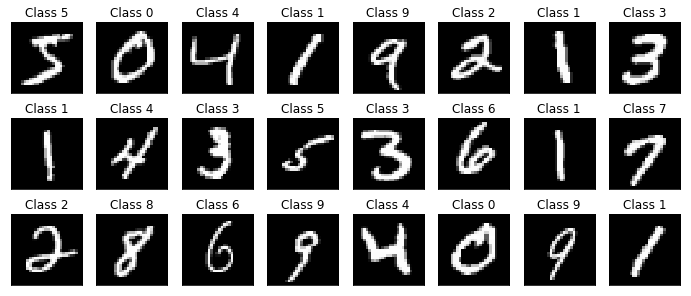

In [3]:
# Echemos un vistazo a unas cuantas imágenes

plt.subplots(3,8, figsize=(12,5))
for i in range(24):
    plt.subplot(3,8,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation=None)
    plt.xticks([])
    plt.yticks([])
    plt.title('Class {}'.format(y_train[i]))

<h2>Random Forests</h2>

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
# El RF espera los arrays de dos dimensiones
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [7]:
%%time
# Creamos un RF con 100 estimadores y lo entrenamos
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

Wall time: 52.1 s


In [8]:
# Vamos a evaluar la precisión del algoritmo
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9695


<h2>Convolutional NN</h2>

In [9]:
# Imports de módulos Keras

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [10]:
# Primero tenemos que hacer un preprocesado previo de las imágenes

# Volvemos a cargar los datos para procesarlos para la CNN
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Cambiar el tamaño al esperado por la CNN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalizar (escala de grises)
X_train /= 255
X_test /= 255

# OHE (One Hot Encoding) de las etiquetas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
def build_model():
    model = Sequential()
    model.add(Convolution2D(32, kernel_size=(3,3), input_shape=(28, 28, 1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
# Creamos y entrenamos la red

model = build_model()
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s - loss: 0.3345 - acc: 0.9005 - val_loss: 0.0851 - val_acc: 0.9741
Epoch 2/10
60000/60000 [==============================] - 39s - loss: 0.1246 - acc: 0.9632 - val_loss: 0.0606 - val_acc: 0.9801
Epoch 3/10
60000/60000 [==============================] - 38s - loss: 0.0943 - acc: 0.9716 - val_loss: 0.0498 - val_acc: 0.9838
Epoch 4/10
60000/60000 [==============================] - 38s - loss: 0.0787 - acc: 0.9758 - val_loss: 0.0471 - val_acc: 0.9834
Epoch 5/10
60000/60000 [==============================] - 38s - loss: 0.0698 - acc: 0.9786 - val_loss: 0.0405 - val_acc: 0.9862
Epoch 6/10
60000/60000 [==============================] - 38s - loss: 0.0614 - acc: 0.9813 - val_loss: 0.0386 - val_acc: 0.9863
Epoch 7/10
60000/60000 [==============================] - 39s - loss: 0.0564 - acc: 0.9822 - val_loss: 0.0352 - val_acc: 0.9877
Epoch 8/10
60000/60000 [==============================

In [13]:
# Vamos a probar el algoritmo una vez entrenado con imágenes del test set

_, (test, _) = mnist.load_data()

El modelo predice que es un 8


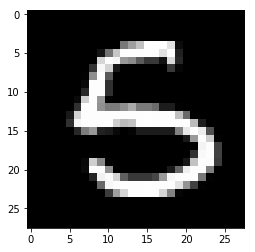

In [24]:
n = 319

plt.imshow(test[n], cmap='gray', interpolation=None)
sample = test[n].reshape(1, 28, 28, 1)
predict = model.predict(sample)
print('El modelo predice que es un {}'.format(predict.argmax()))

In [20]:
for n in range(0,10000):
    sample = test[n].reshape(1, 28, 28, 1)
    predict = model.predict(sample)
    if predict.argmax() != y_test[n].argmax():
        print(n)

2
5
8
14
18
29
31
37
39
40
45
46
57
59
62
63
65
73
74
78
79
89
92
94
95
96
97
107
111
115
119
121
127
132
135
137
143
145
149
151
153
154
155
160
167
168
171
175
176
178
180
182
189
190
191
195
196
202
203
204
207
211
217
218
222
224
228
239
240
241
247
251
261
264
265
267
272
276
278
279
282
288
289
302
308
314
317
319
320
321
324
325
329
330
332
333
340
342
345
346
347
348
350
352
354
357
359
377
378
385
386
388
393
395
397
406
409
411
412
416
419
427
430
433
443
444
445
447
448
455
457
460
468
469
473
476
478
479
480
483
489
492
497
498
502
504
506
507
508
509
511
515
518
523
524
529
537
540
550
551
552
554
570
571
578
583
584
593
595
604
605
610
613
615
619
624
637
640
645
646
647
652
654
658
659
663
666
667
670
672
674
675
682
684
689
692
694
695
696
700
707
711
712
716
717
720
725
726
728
735
738
739
740
745
749
751
754
755
760
766
767
768
772
777
778
779
783
786
790
797
798
809
813
818
823
824
826
827
829
831
834
835
836
840
846
848
850
853
856
857
866
869
870
882
889
894
895
89

6419
6430
6432
6434
6438
6441
6445
6449
6456
6458
6460
6468
6471
6472
6480
6481
6482
6484
6490
6500
6502
6506
6511
6515
6525
6527
6530
6533
6537
6540
6544
6545
6553
6556
6558
6560
6561
6569
6572
6573
6574
6576
6577
6597
6598
6599
6600
6601
6604
6609
6611
6618
6620
6622
6623
6628
6634
6635
6636
6644
6645
6651
6652
6661
6670
6673
6678
6680
6683
6688
6691
6694
6695
6702
6706
6708
6712
6716
6718
6720
6721
6724
6726
6729
6730
6731
6733
6737
6741
6743
6744
6746
6747
6748
6749
6751
6756
6757
6758
6759
6762
6768
6769
6780
6783
6784
6788
6789
6791
6799
6809
6813
6817
6819
6829
6847
6848
6867
6868
6869
6883
6884
6891
6899
6901
6902
6909
6913
6917
6928
6938
6942
6948
6954
6961
6964
6969
6976
6981
6983
6986
6988
6990
6991
6997
7000
7002
7003
7005
7014
7019
7023
7030
7033
7040
7048
7049
7050
7053
7063
7067
7073
7087
7090
7091
7102
7123
7134
7138
7150
7155
7160
7165
7167
7171
7173
7176
7183
7191
7195
7205
7210
7217
7223
7226
7228
7230
7232
7233
7235
7237
7238
7240
7241
7247
7249
7253
7262
7268
7270
